In [77]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'bold'   # 设置字体加粗
plt.rcParams['axes.unicode_minus'] = False  # 上述字库没负号，因此负号不进行字体变换


In [78]:
#定义食物链的动态微分方程
def model(y,t,r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e):
    P,I,C=y
    dPdt=P*r_P*w*(1-P/K_P)-P*I*alpha_PI
    dIdt=-beta_I*gamma_I*I+e*alpha_PI*P*I-alpha_IC*I*C
    dCdt=-beta_C*C+e*alpha_IC*I*C
    return [dPdt,dIdt,dCdt]

一、不考虑季节性变化、除草剂和杀虫剂的食物链模型

In [79]:
#定义模型参数
r_P=1#生产者的自然增长率
K_P=10000#生产者的环境承载量
alpha_PI=0.002#生产者和昆虫的相互作用系数
w=1#除草剂对生产者生产速率的影响
beta_I=0.05#昆虫的自然死亡率
alpha_IC=0.002#昆虫和次级捕食者的相互作用系数
gamma_I=1#杀虫剂对昆虫的杀害效果
beta_C=0.08#次级捕食者的自然死亡率
e=0.1#能量传递效率

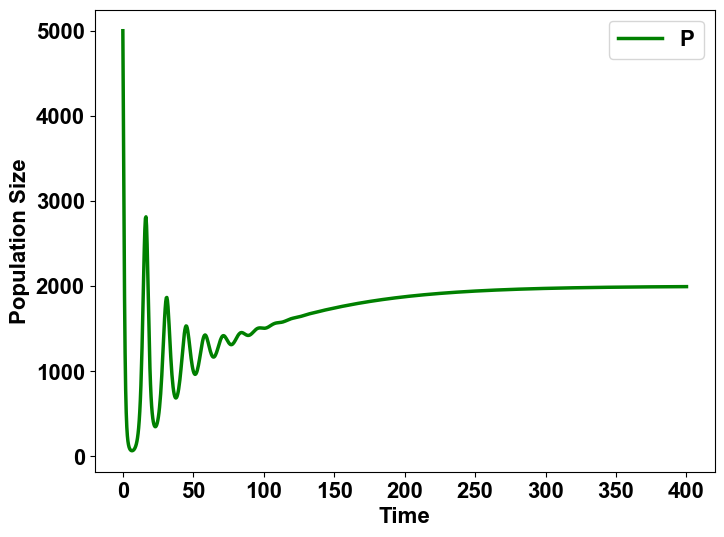

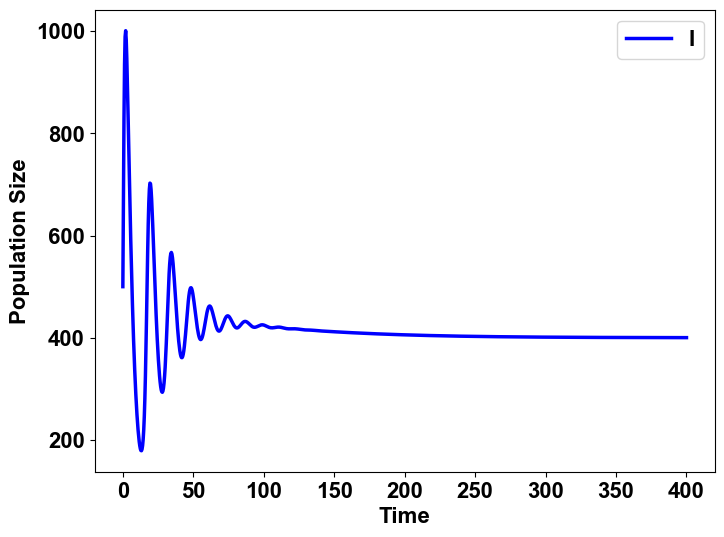

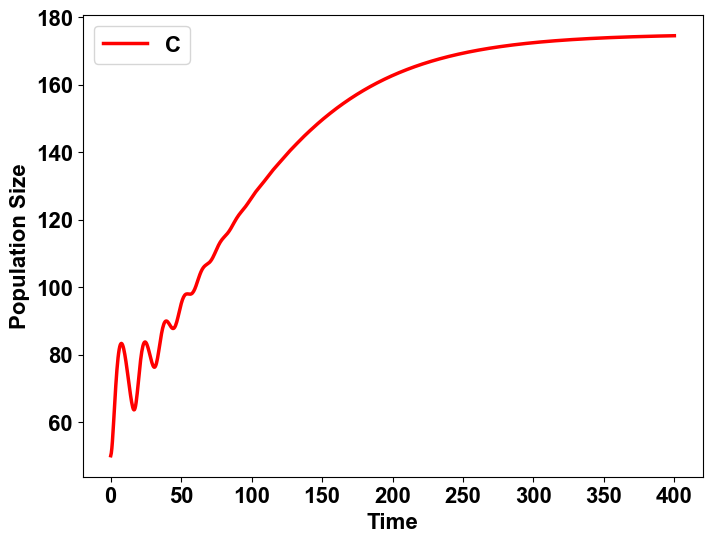

In [80]:
#初始条件
P0=5000#初始生产者的数量
I0=500#初始初级消费者的数量
C0=50#初始次级消费者的数量
y0=[P0,I0,C0]
#时间网格
t=np.linspace(0,400,1000)
solution=odeint(model,y0,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e))
P,I,C=solution.T
#绘制结果
plt.figure(figsize=(8,6))
plt.plot(t,P,label="P",c="g",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,I,label="I",c="b",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,C,label="C",c="r",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper left")

二、考虑杀虫剂的影响

In [81]:
#定义模型参数
r_P=1#生产者的自然增长率
K_P=10000#生产者的环境承载量
alpha_PI=0.002#生产者和昆虫的相互作用系数
w=1#除草剂对生产者生产速率的影响
beta_I=0.05#昆虫的自然死亡率
alpha_IC=0.002#昆虫和次级捕食者的相互作用系数
gamma_I=[1,5,10]#杀虫剂对昆虫的杀害效果
beta_C=0.08#次级捕食者的自然死亡率
e=0.1#能量传递效率

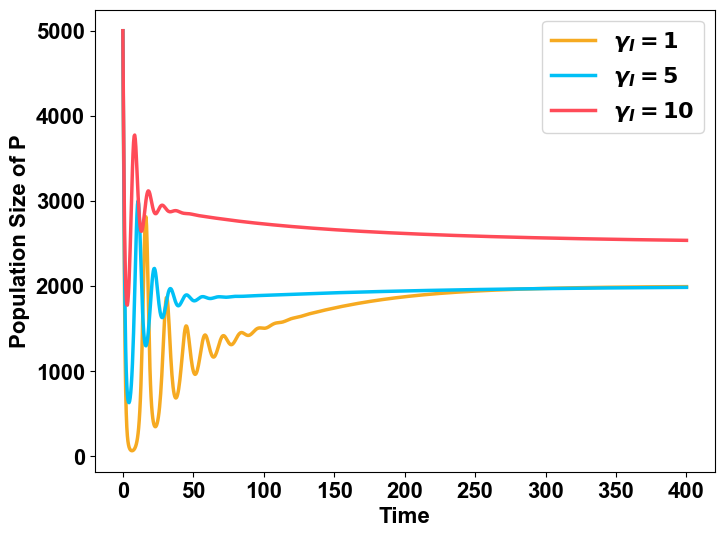

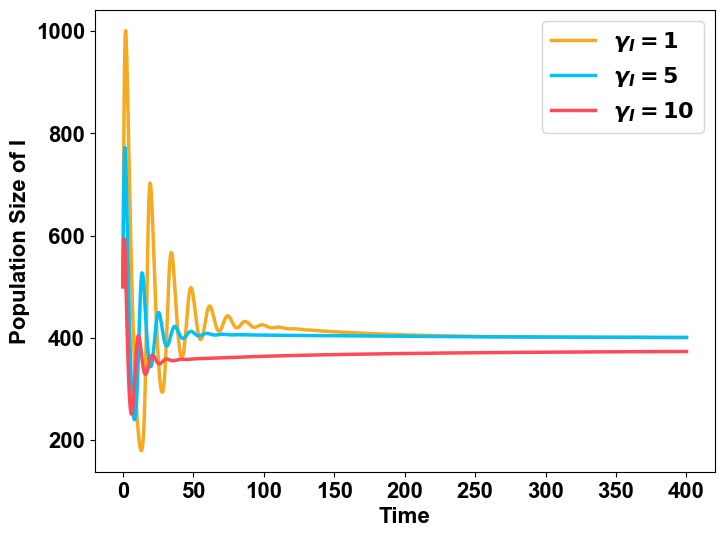

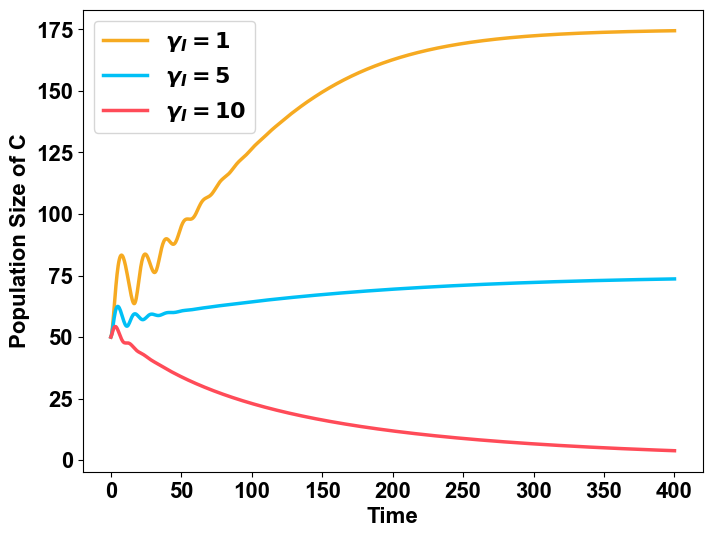

In [82]:
#初始条件
P0=5000#初始生产者的数量
I0=500#初始初级消费者的数量
C0=50#初始次级消费者的数量
y0=[P0,I0,C0]
#时间网格
t=np.linspace(0,400,1000)
solution_1=odeint(model,y0,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I[0],beta_C,e))
solution_2=odeint(model,y0,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I[1],beta_C,e))
solution_3=odeint(model,y0,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I[2],beta_C,e))
P_1,I_1,C_1=solution_1.T
P_2,I_2,C_2=solution_2.T
P_3,I_3,C_3=solution_3.T
#绘制结果
plt.figure(figsize=(8,6))
plt.plot(t,P_1,label=r'$\gamma_{I}=1$',linewidth=2.5,color='#F6AA21')
plt.plot(t,P_2,label=r'$\gamma_{I}=5$',linewidth=2.5,color='#00C0F6')
plt.plot(t,P_3,label=r'$\gamma_{I}=10$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of P",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,I_1,label=r'$\gamma_{I}=1$',linewidth=2.5,color='#F6AA21')
plt.plot(t,I_2,label=r'$\gamma_{I}=5$',linewidth=2.5,color='#00C0F6')
plt.plot(t,I_3,label=r'$\gamma_{I}=10$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of I",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,C_1,label=r'$\gamma_{I}=1$',linewidth=2.5,color='#F6AA21')
plt.plot(t,C_2,label=r'$\gamma_{I}=5$',linewidth=2.5,color='#00C0F6')
plt.plot(t,C_3,label=r'$\gamma_{I}=10$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of C",weight='bold')
plt.legend(loc="upper left")

三、考虑除草剂的影响

In [83]:
#定义模型参数
r_P=1#生产者的自然增长率
K_P=10000#生产者的环境承载量
alpha_PI=0.002#生产者和昆虫的相互作用系数
w=[1,1.2,1.5]#除草剂对生产者生产速率的影响
beta_I=0.05#昆虫的自然死亡率
alpha_IC=0.002#昆虫和次级捕食者的相互作用系数
gamma_I=1#杀虫剂对昆虫的杀害效果
beta_C=0.08#次级捕食者的自然死亡率
e=0.1#能量传递效率

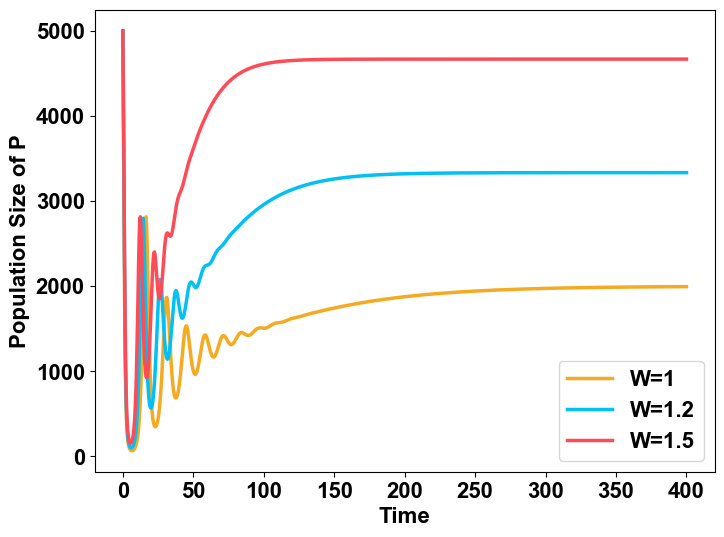

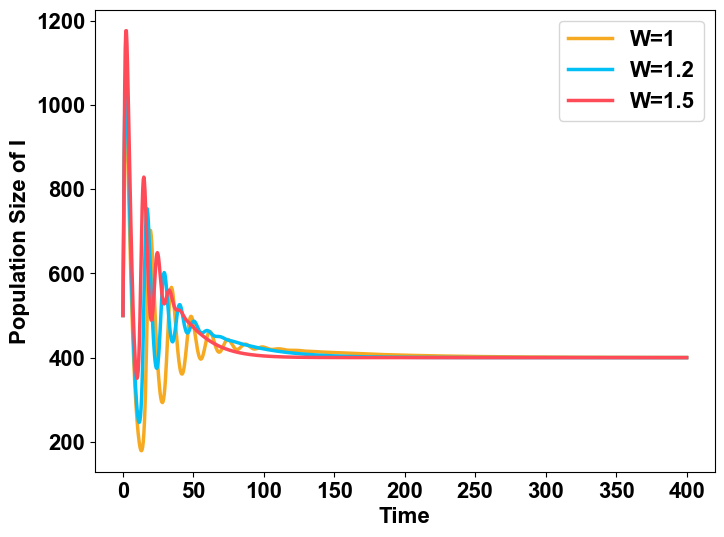

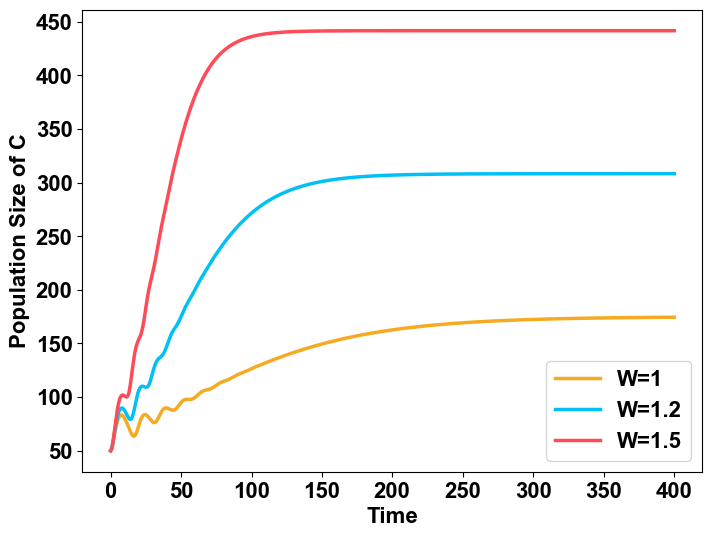

In [84]:
#初始条件
P0=5000#初始生产者的数量
I0=500#初始初级消费者的数量
C0=50#初始次级消费者的数量
y0=[P0,I0,C0]
#时间网格
t=np.linspace(0,400,1000)
solution_1=odeint(model,y0,t,args=(r_P,K_P,alpha_PI,w[0],beta_I,alpha_IC,gamma_I,beta_C,e))
solution_2=odeint(model,y0,t,args=(r_P,K_P,alpha_PI,w[1],beta_I,alpha_IC,gamma_I,beta_C,e))
solution_3=odeint(model,y0,t,args=(r_P,K_P,alpha_PI,w[2],beta_I,alpha_IC,gamma_I,beta_C,e))
P_1,I_1,C_1=solution_1.T
P_2,I_2,C_2=solution_2.T
P_3,I_3,C_3=solution_3.T
#绘制结果
plt.figure(figsize=(8,6))
plt.plot(t,P_1,label='W=1',linewidth=2.5,color='#F6AA21')
plt.plot(t,P_2,label='W=1.2',linewidth=2.5,color='#00C0F6')
plt.plot(t,P_3,label='W=1.5',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of P",weight='bold')
plt.legend(loc="lower right")

plt.figure(figsize=(8,6))
plt.plot(t,I_1,label='W=1',linewidth=2.5,color='#F6AA21')
plt.plot(t,I_2,label='W=1.2',linewidth=2.5,color='#00C0F6')
plt.plot(t,I_3,label='W=1.5',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of I",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,C_1,label='W=1',linewidth=2.5,color='#F6AA21')
plt.plot(t,C_2,label='W=1.2',linewidth=2.5,color='#00C0F6')
plt.plot(t,C_3,label='W=1.5',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of C",weight='bold')
plt.legend(loc="lower right")

四、考虑季节性变化

In [85]:
#定义模型参数
r_P0=1
K_P=10000#生产者的环境承载量
alpha_PI=0.002#生产者和昆虫的相互作用系数
w=1#除草剂对生产者生产速率的影响
beta_I=0.05#昆虫的自然死亡率
alpha_IC=0.002#昆虫和次级捕食者的相互作用系数
gamma_I=1#杀虫剂对昆虫的杀害效果
beta_C=0.08#次级捕食者的自然死亡率
e=0.1#能量传递效率

In [86]:
#定义食物链的动态微分方程
def model(y,t,r_P,K_P,alpha_PI,w,d_I,alpha_IC,gamma_I,d_C,e):
    P,I,C=y
    r_P=r_P0+0.2*np.sin(2*np.pi*t/150)
    dPdt=P*r_P*w*(1-P/K_P)-P*I*alpha_PI
    dIdt=-d_I*gamma_I*I+e*alpha_PI*P*I-alpha_IC*I*C
    dCdt=-d_C*C+e*alpha_IC*I*C
    return [dPdt,dIdt,dCdt]

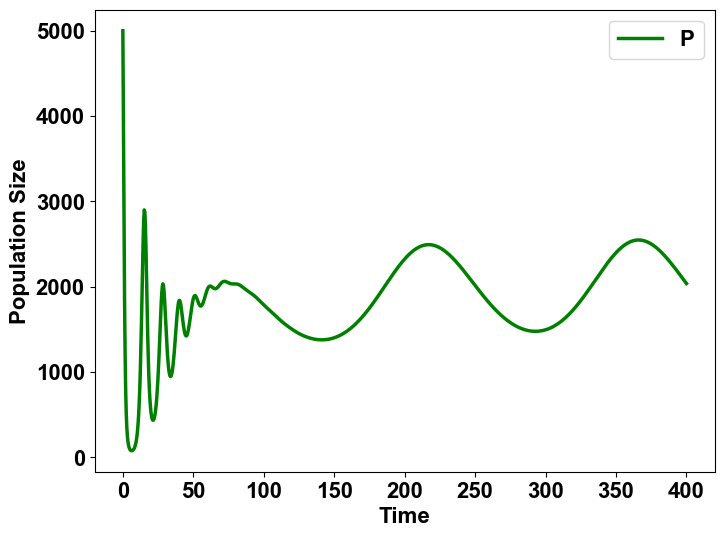

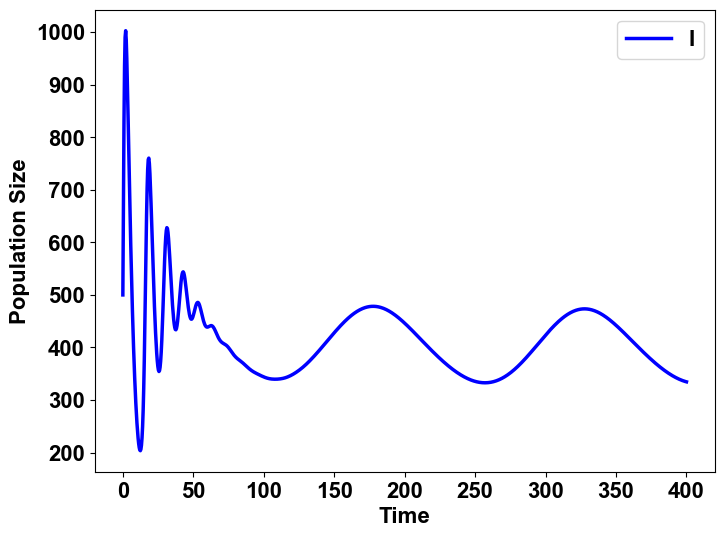

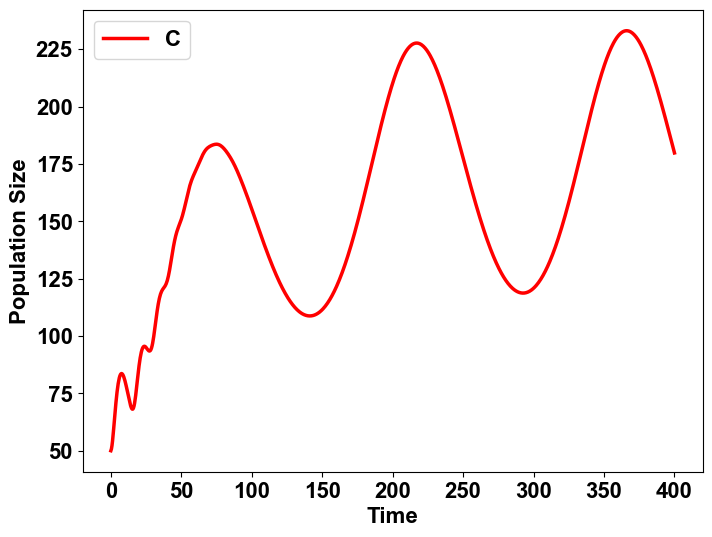

In [87]:
#初始条件
P0=5000#初始生产者的数量
I0=500#初始初级消费者的数量
C0=50#初始次级消费者的数量
y0=[P0,I0,C0]
#时间网格
t=np.linspace(0,400,1000)
solution=odeint(model,y0,t,args=(r_P0,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e))
P,I,C=solution.T
#绘制结果
plt.figure(figsize=(8,6))
plt.plot(t,P,label="P",c="g",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,I,label="I",c="b",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,C,label="C",c="r",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper left")

五、引入两个物种

(一)、情况1:引入的A物种是植食性捕食者，与昆虫I存在竞争关系；

引入的B物种是肉身性捕食者，以次级消费者C为食，并以植食性捕食者A为食

我们将讨论以下情况：

1、A物种的数量一开始处于劣势时，通过调整A与I的竞争系数，查看物种A和物种B对生态系统平衡的影响

2、A物种的数量一开始处于与I数量相等时，通过调整A与I的竞争系数，查看物种A和物种B对生态系统平衡的影响


In [88]:
def two_species_model_1(y,t,r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI,beta_A,beta_B,alpha_AB):
    P,I,C,A,B=y
    dPdt=P*r_P*w*(1-P/K_P)-P*I*alpha_PI-alpha_PA*P*A
    dIdt=-beta_I*gamma_I*I+e*alpha_PI*P*I-alpha_IC*I*C-delta_AI*I*A
    dCdt=-beta_C*C+e*alpha_IC*I*C-alpha_CB*C*B
    dAdt=-beta_A*A+e*alpha_PA*P*A-(alpha_AB)*B*A-delta_AI*I*A
    dBdt=-(beta_B)*B+e*(alpha_CB)*B*C+e*(alpha_AB)*B*A
    return [dPdt,dIdt,dCdt,dAdt,dBdt]

In [89]:
#定义模型参数
r_P=1#生产者的自然增长率
K_P=10000#生产者的环境承载量
alpha_PI=0.002#生产者对昆虫的供养能力
w=1#除草剂对生产者生产速率的影响
beta_I=0.05#昆虫的自然死亡率
alpha_IC=0.002#昆虫对次级捕食者的供养能力
gamma_I=1#杀虫剂对昆虫的杀害效果
beta_C=0.08#次级捕食者的自然死亡率
e=0.1#能量传递效率
alpha_PA=0.002#生产者对物种A的供养能力
delta_AI=[0.01,0.0001,0]#物种A和昆虫I的竞争系数
alpha_CB=0.005#次级消费者C对物种B的供养能力
alpha_AB=0.002#初级消费者A对物种B的供养能力
beta_A=0.05#物种A的自然死亡率
beta_B=0.08#物种B的自然死亡率

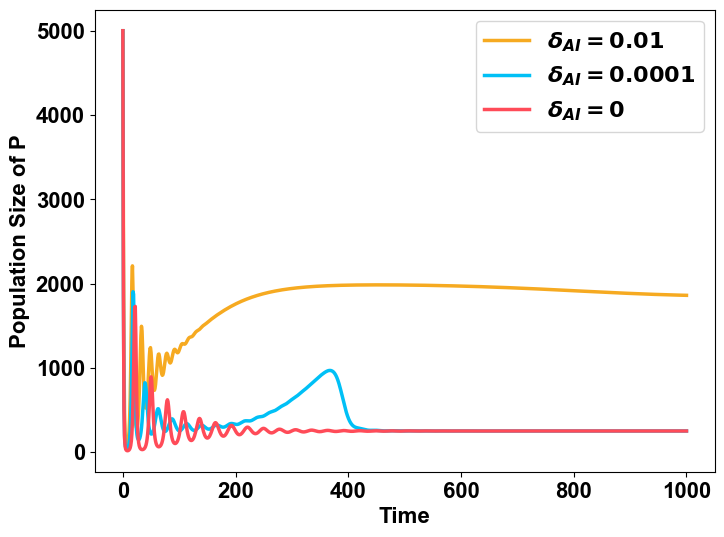

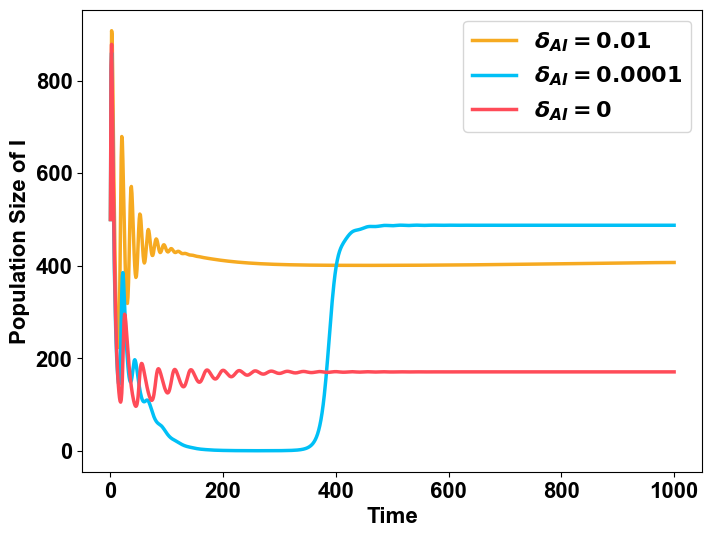

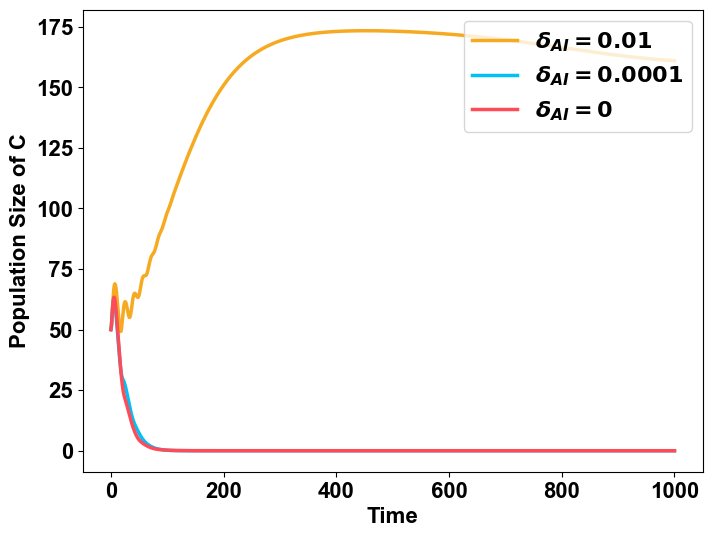

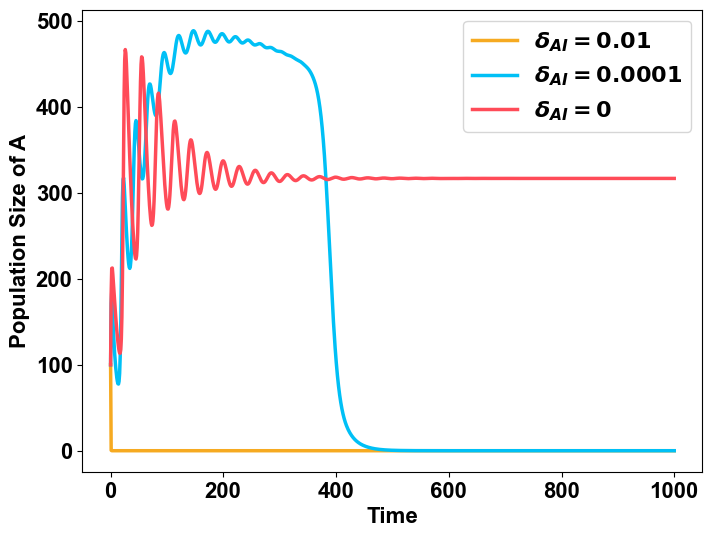

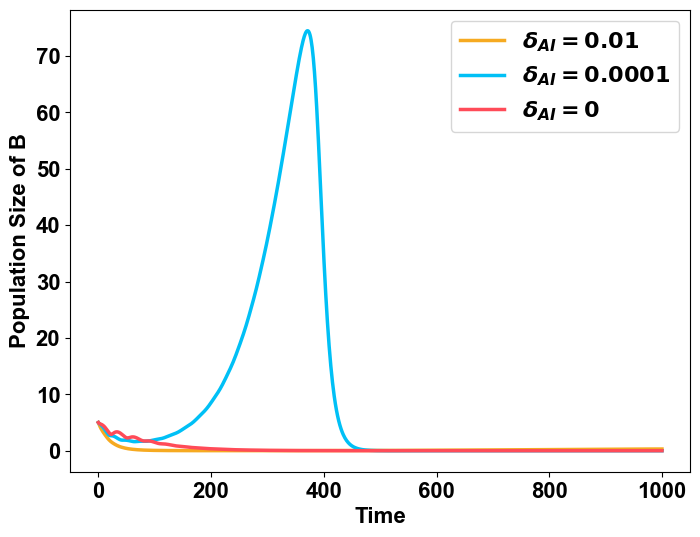

In [90]:
#初始条件
P0=5000#初始生产者的数量
I0=500#初始初级消费者的数量
C0=50#初始次级消费者的数量
A0=[100,500]#初始A物种的数量
B0=5#初始B物种的数量
y0_1=[P0,I0,C0,A0[0],B0]
y0_2=[P0,I0,C0,A0[1],B0]
#时间网格
t=np.linspace(0,1000,1000)
solution_1=odeint(two_species_model_1,y0_1,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI[0],beta_A,beta_B,alpha_AB))
solution_2=odeint(two_species_model_1,y0_1,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI[1],beta_A,beta_B,alpha_AB))
solution_3=odeint(two_species_model_1,y0_1,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI[2],beta_A,beta_B,alpha_AB))
P_1,I_1,C_1,A_1,B_1=solution_1.T
P_2,I_2,C_2,A_2,B_2=solution_2.T
P_3,I_3,C_3,A_3,B_3=solution_3.T
#绘制结果
plt.figure(figsize=(8,6))
plt.plot(t,P_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,P_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,P_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of P",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,I_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,I_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,I_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of I",weight='bold')
plt.legend(loc="upper right")


plt.figure(figsize=(8,6))
plt.plot(t,C_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,C_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,C_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of C",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,A_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,A_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,A_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of A",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,B_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,B_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,B_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of B",weight='bold')
plt.legend(loc="upper right")

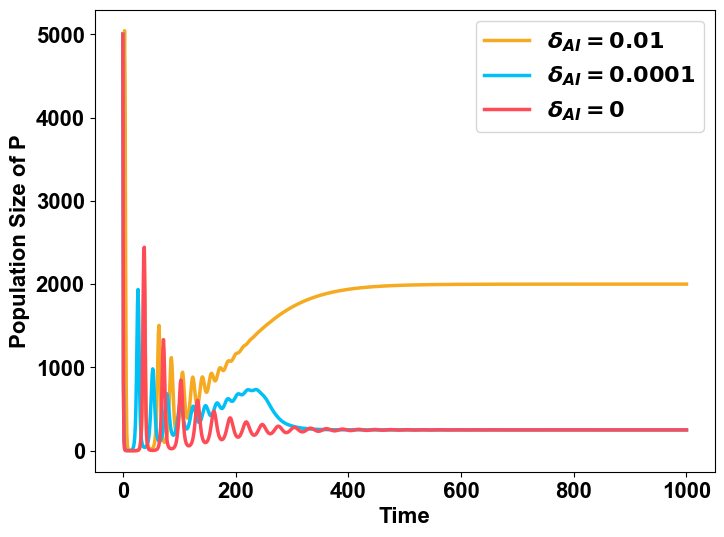

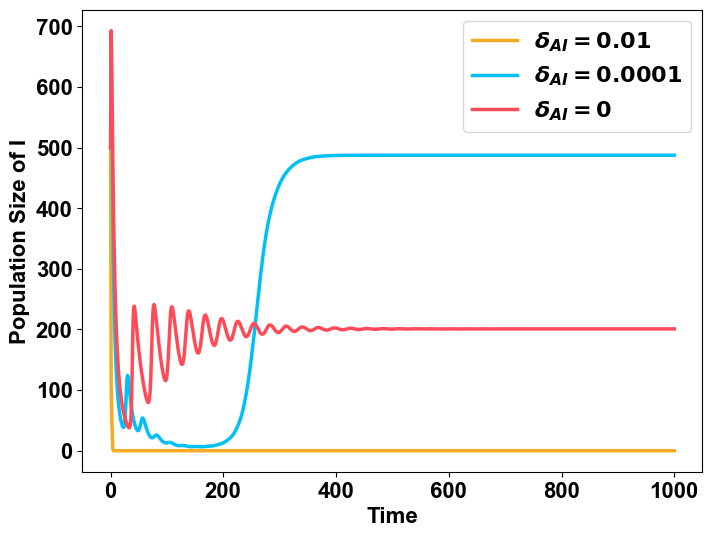

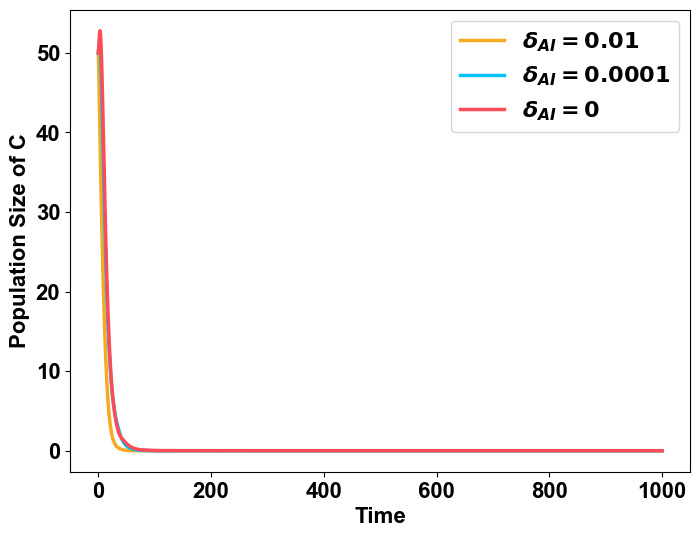

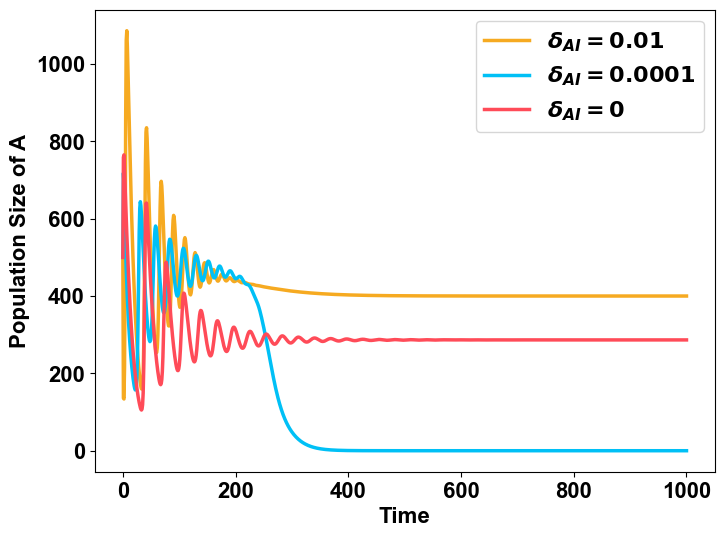

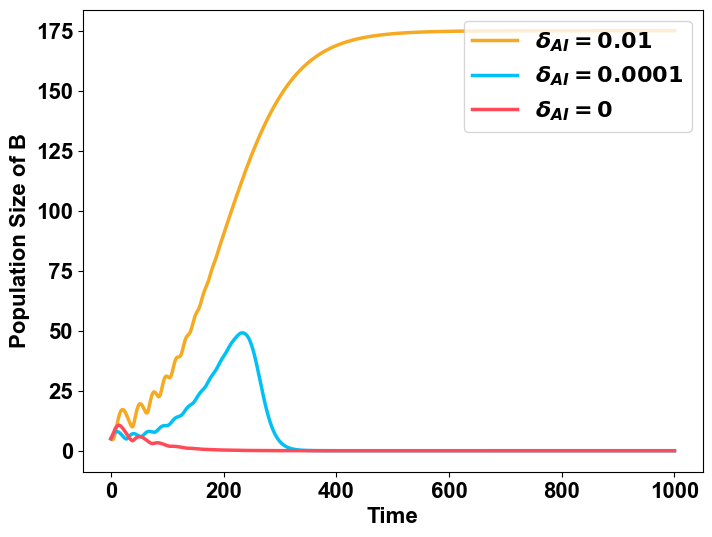

In [91]:
#初始条件
P0=5000#初始生产者的数量
I0=500#初始初级消费者的数量
C0=50#初始次级消费者的数量
A0=[100,500]#初始A物种的数量
B0=5#初始B物种的数量
y0_1=[P0,I0,C0,A0[0],B0]
y0_2=[P0,I0,C0,A0[1],B0]
#时间网格
t=np.linspace(0,1000,1000)
solution_1=odeint(two_species_model_1,y0_2,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI[0],beta_A,beta_B,alpha_AB))
solution_2=odeint(two_species_model_1,y0_2,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI[1],beta_A,beta_B,alpha_AB))
solution_3=odeint(two_species_model_1,y0_2,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI[2],beta_A,beta_B,alpha_AB))
P_1,I_1,C_1,A_1,B_1=solution_1.T
P_2,I_2,C_2,A_2,B_2=solution_2.T
P_3,I_3,C_3,A_3,B_3=solution_3.T
#绘制结果
plt.figure(figsize=(8,6))
plt.plot(t,P_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,P_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,P_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of P",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,I_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,I_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,I_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of I",weight='bold')
plt.legend(loc="upper right")


plt.figure(figsize=(8,6))
plt.plot(t,C_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,C_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,C_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of C",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,A_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,A_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,A_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of A",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,B_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,B_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,B_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of B",weight='bold')
plt.legend(loc="upper right")

(二)、情况2:引入的A物种是植食性捕食者，与昆虫I存在竞争关系；

引入的B物种是肉身性捕食者，以次级消费者C为食，但不以植食性捕食者A为食

我们将讨论以下情况：

1、A物种的数量一开始处于劣势时，通过调整A与I的竞争系数，查看物种A和物种B对生态系统平衡的影响

2、A物种的数量一开始处于与I数量相等时，通过调整A与I的竞争系数，查看物种A和物种B对生态系统平衡的影响

In [92]:
def two_species_model_2(y,t,r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI,beta_A,beta_B,alpha_AB):
    P,I,C,A,B=y
    dPdt=P*r_P*w*(1-P/K_P)-P*I*alpha_PI-alpha_PA*P*A
    dIdt=-beta_I*gamma_I*I+e*alpha_PI*P*I-alpha_IC*I*C-delta_AI*I*A
    dCdt=-beta_C*C+e*alpha_IC*I*C-alpha_CB*C*B
    dAdt=-beta_A*A+e*alpha_PA*P*A-delta_AI*I*A
    dBdt=-(beta_B)*B+e*(alpha_CB)*B*C
    return [dPdt,dIdt,dCdt,dAdt,dBdt]

In [93]:
#定义模型参数
r_P=1#生产者的自然增长率
K_P=10000#生产者的环境承载量
alpha_PI=0.002#生产者对昆虫的供养能力
w=1#除草剂对生产者生产速率的影响
beta_I=0.05#昆虫的自然死亡率
alpha_IC=0.002#昆虫对次级捕食者的供养能力
gamma_I=1#杀虫剂对昆虫的杀害效果
beta_C=0.08#次级捕食者的自然死亡率
e=0.1#能量传递效率
alpha_PA=0.002#生产者对物种A的供养能力
delta_AI=[0.01,0.0001,0]#物种A和昆虫I的竞争系数
alpha_CB=0.005#次级消费者C对物种B的供养能力
alpha_AB=0.002#初级消费者A对物种B的供养能力
beta_A=0.05#物种A的自然死亡率
beta_B=0.08#物种B的自然死亡率

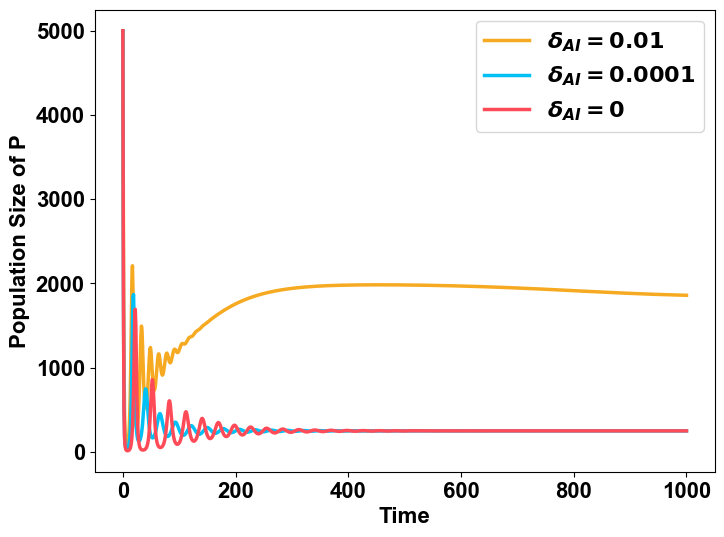

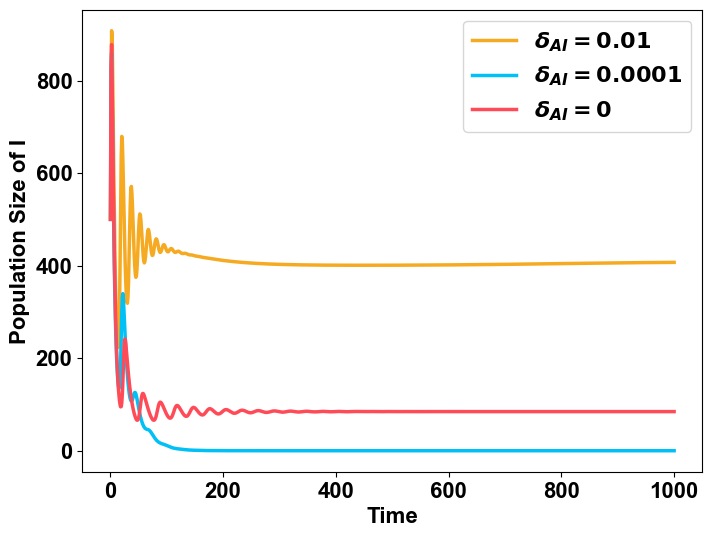

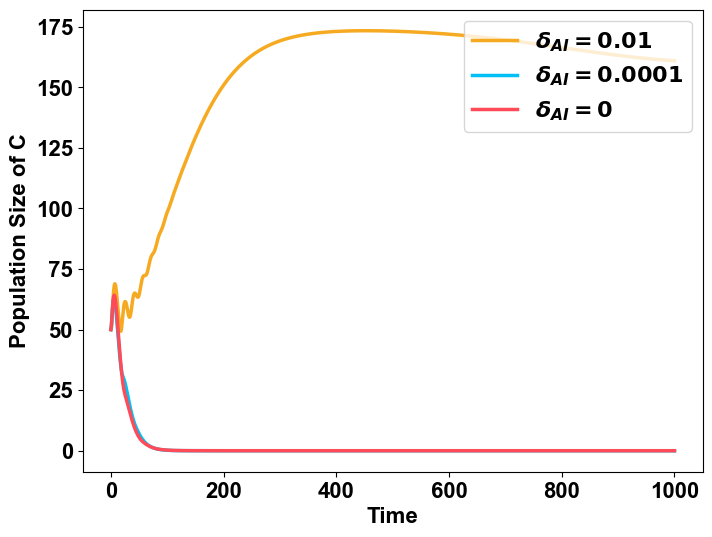

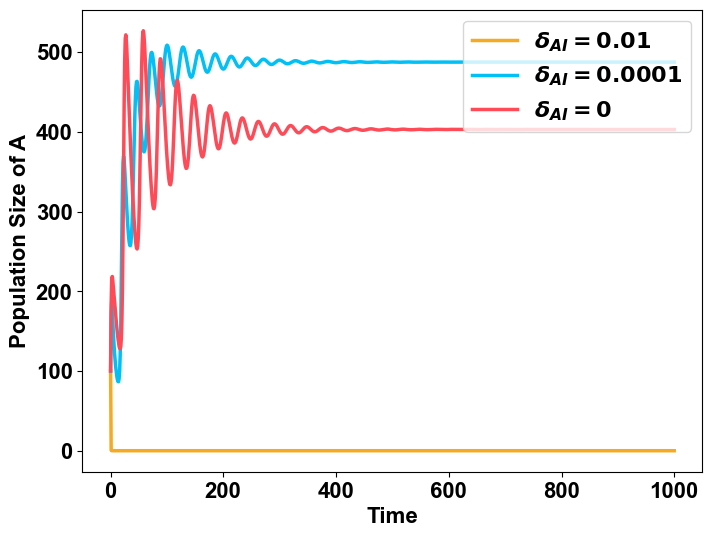

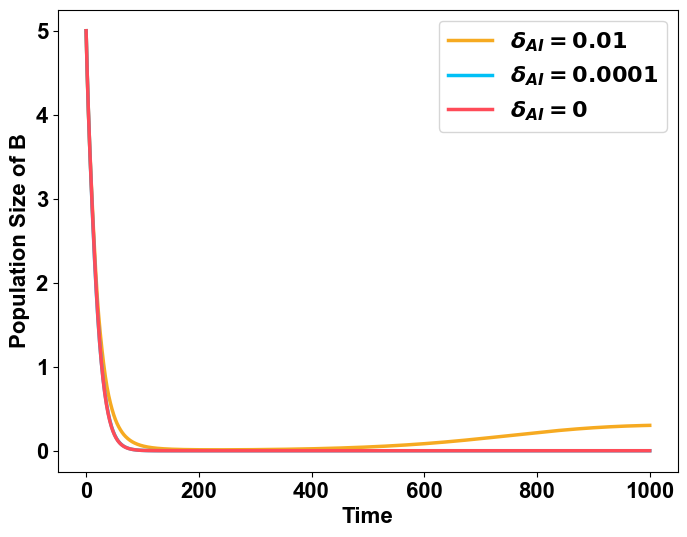

In [94]:
#初始条件
P0=5000#初始生产者的数量
I0=500#初始初级消费者的数量
C0=50#初始次级消费者的数量
A0=[100,500]#初始A物种的数量
B0=5#初始B物种的数量
y0_1=[P0,I0,C0,A0[0],B0]
y0_2=[P0,I0,C0,A0[1],B0]
#时间网格
t=np.linspace(0,1000,1000)
solution_1=odeint(two_species_model_2,y0_1,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI[0],beta_A,beta_B,alpha_AB))
solution_2=odeint(two_species_model_2,y0_1,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI[1],beta_A,beta_B,alpha_AB))
solution_3=odeint(two_species_model_2,y0_1,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI[2],beta_A,beta_B,alpha_AB))
P_1,I_1,C_1,A_1,B_1=solution_1.T
P_2,I_2,C_2,A_2,B_2=solution_2.T
P_3,I_3,C_3,A_3,B_3=solution_3.T
#绘制结果
plt.figure(figsize=(8,6))
plt.plot(t,P_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,P_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,P_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of P",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,I_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,I_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,I_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of I",weight='bold')
plt.legend(loc="upper right")


plt.figure(figsize=(8,6))
plt.plot(t,C_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,C_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,C_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of C",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,A_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,A_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,A_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of A",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,B_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,B_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,B_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of B",weight='bold')
plt.legend(loc="upper right")

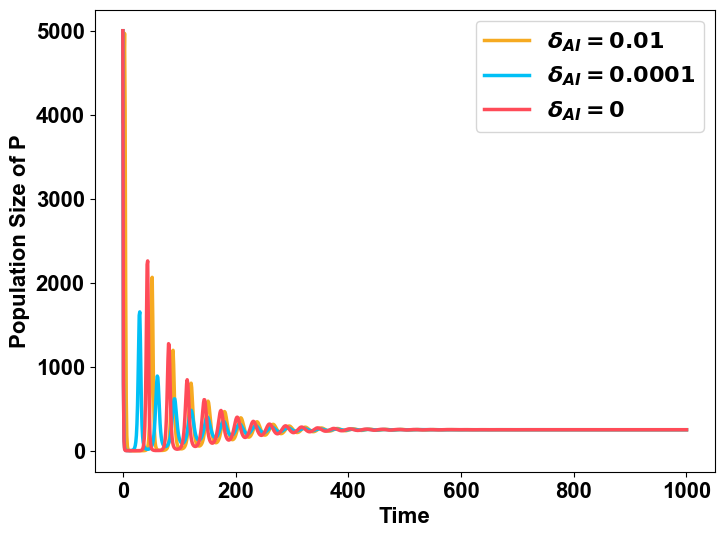

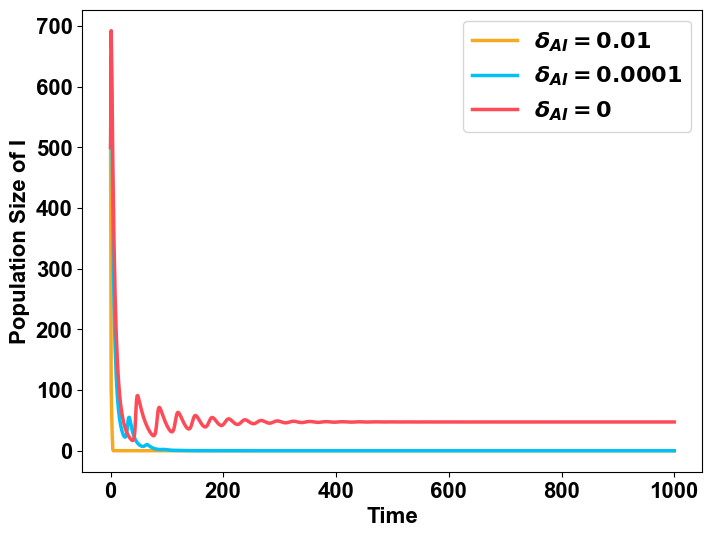

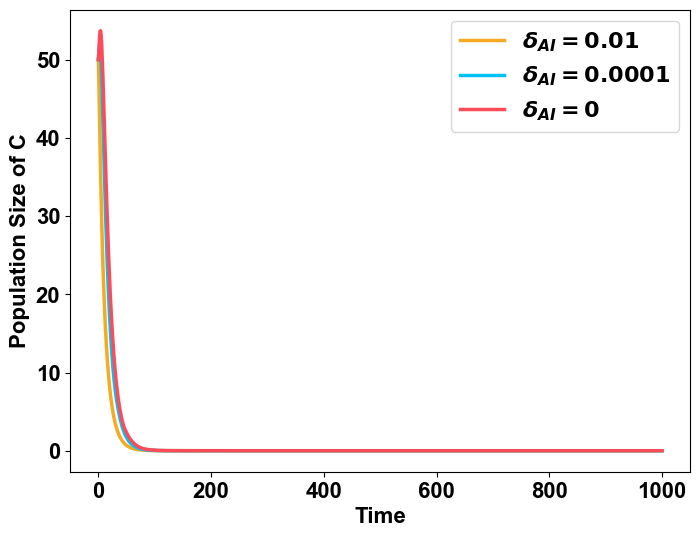

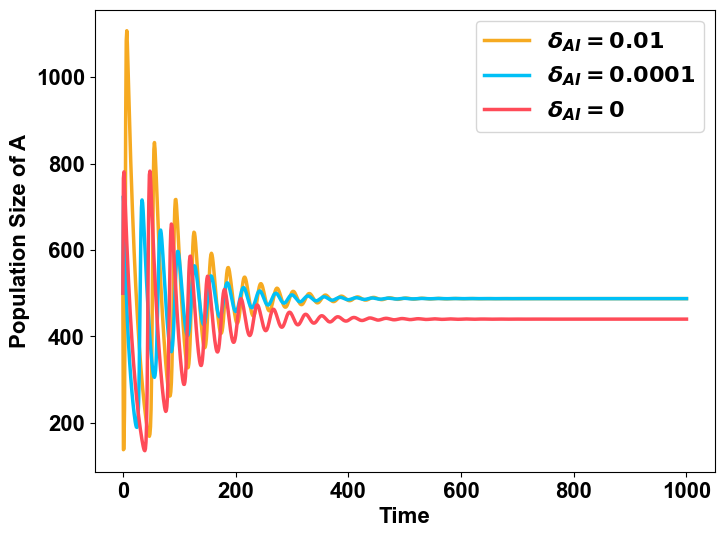

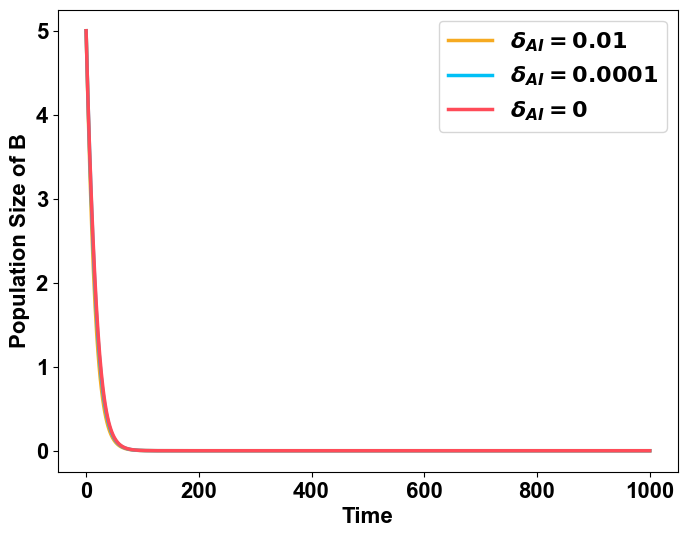

In [95]:
#初始条件
P0=5000#初始生产者的数量
I0=500#初始初级消费者的数量
C0=50#初始次级消费者的数量
A0=[100,500]#初始A物种的数量
B0=5#初始B物种的数量
y0_1=[P0,I0,C0,A0[0],B0]
y0_2=[P0,I0,C0,A0[1],B0]
#时间网格
t=np.linspace(0,1000,1000)
solution_1=odeint(two_species_model_2,y0_2,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI[0],beta_A,beta_B,alpha_AB))
solution_2=odeint(two_species_model_2,y0_2,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI[1],beta_A,beta_B,alpha_AB))
solution_3=odeint(two_species_model_2,y0_2,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,alpha_PA,alpha_CB,delta_AI[2],beta_A,beta_B,alpha_AB))
P_1,I_1,C_1,A_1,B_1=solution_1.T
P_2,I_2,C_2,A_2,B_2=solution_2.T
P_3,I_3,C_3,A_3,B_3=solution_3.T
#绘制结果
plt.figure(figsize=(8,6))
plt.plot(t,P_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,P_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,P_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of P",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,I_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,I_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,I_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of I",weight='bold')
plt.legend(loc="upper right")


plt.figure(figsize=(8,6))
plt.plot(t,C_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,C_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,C_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of C",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,A_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,A_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,A_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of A",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,B_1,label=r'$\delta_{AI}=0.01$',linewidth=2.5,color='#F6AA21')
plt.plot(t,B_2,label=r'$\delta_{AI}=0.0001$',linewidth=2.5,color='#00C0F6')
plt.plot(t,B_3,label=r'$\delta_{AI}=0$',linewidth=2.5,color='#FF4B58')
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size of B",weight='bold')
plt.legend(loc="upper right")